In [31]:
from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open('./mushroom.jpg')
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.rcParams['font.size'] = 9  # 你可以尝试更小或更大的值


    plt.tight_layout()

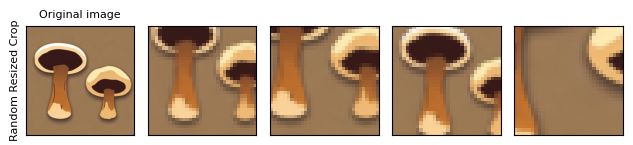

In [32]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops,row_title=['Random Resized Crop'])

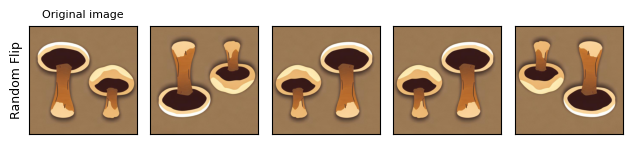

In [38]:
hflipper = T.RandomHorizontalFlip(p=0.5) # p=1确保每次都翻转
vflipper = T.RandomVerticalFlip(p=0.5) # p=1确保每次都翻转

# hflipped_imgs = [hflipper(orig_img) for _ in range(4)]
# vflipped_imgs = [vflipper(orig_img) for _ in range(4)]
hvflipped_imgs = [hflipper(vflipper(orig_img)) for _ in range(4)]

plot(hvflipped_imgs, 
     with_orig=True, 
     row_title=['Random Flip'])


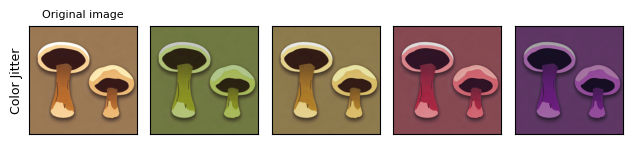

In [33]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs,row_title=['Color Jitter'])

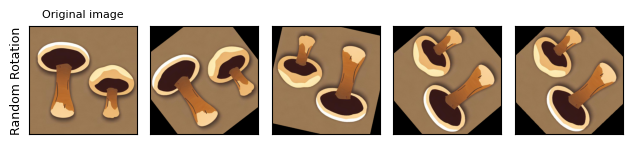

In [34]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs,row_title=['Random Rotation'])